In [1]:
import zarr

In [2]:
BUCKET = 'dev-nlcd-developer'

In [3]:
work = 'H16V04_Y10X14'

In [4]:
def get_work(work_str):
    
    next = work_str.split('X')[0]
    X = work_str.split('X')[1]
    #print(next, X)
    Y = next.split('Y')[1]
    nex = next.split('Y')[0]
    ne, V_ = nex.split('V')
    V = V_.replace('_','')
    H = ne.replace('H','')
    #print(H,V,Y,X)
    return (H,V,Y,X)

In [5]:
(H,V,Y,X) = get_work(work)

In [6]:
print(H,V,Y,X)

16 04 10 14


In [7]:
Z_store = f's3://{BUCKET}/dswe/v0/intsm/_H{H}V{V}_Y{Y}X{X}_store.zarr'

In [8]:
# To load the Zarr array back into a NumPy array
dswe_array = zarr.load(Z_store)

# Verify the loaded array
print(dswe_array.shape)

(49, 250, 250)


In [9]:
mask255 = (dswe_array == 255)
dswe_array[mask255] = 5

In [10]:
import matplotlib.pyplot as pyplot
from rasterio.plot import show

def my_plot(array):
    print(array.shape)
    cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r']
    axs=()
    fig, axs = pyplot.subplots(1,7, figsize=(21,21))
    for i in range(0,7):
        show(array[i], ax=axs[i], cmap='viridis', title=i)
    pyplot.show()

(7, 250, 250)


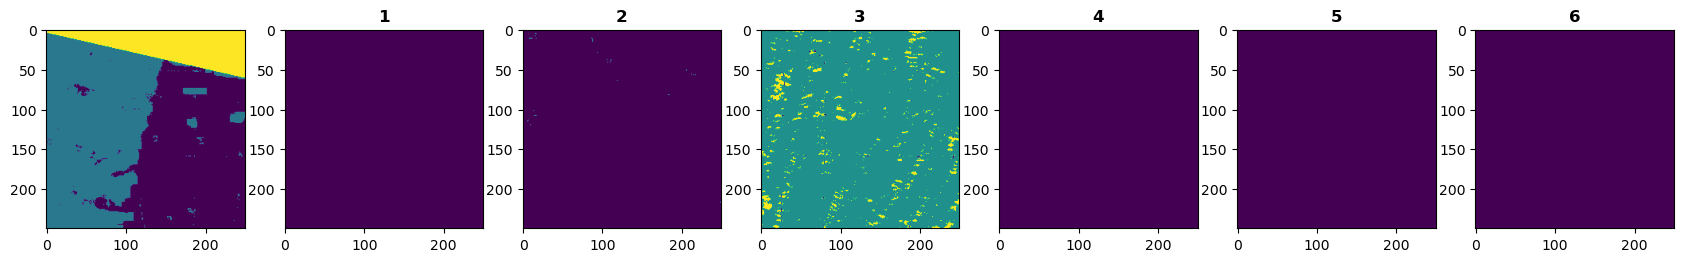

(7, 250, 250)


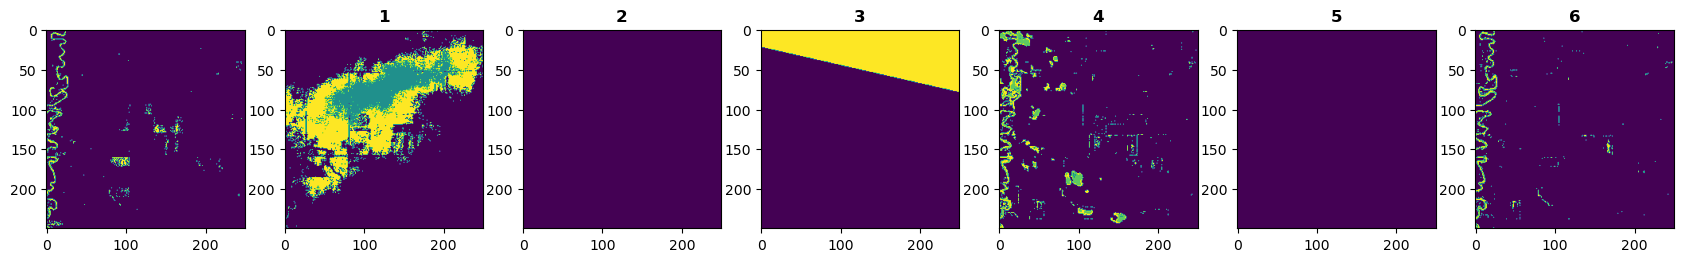

(7, 250, 250)


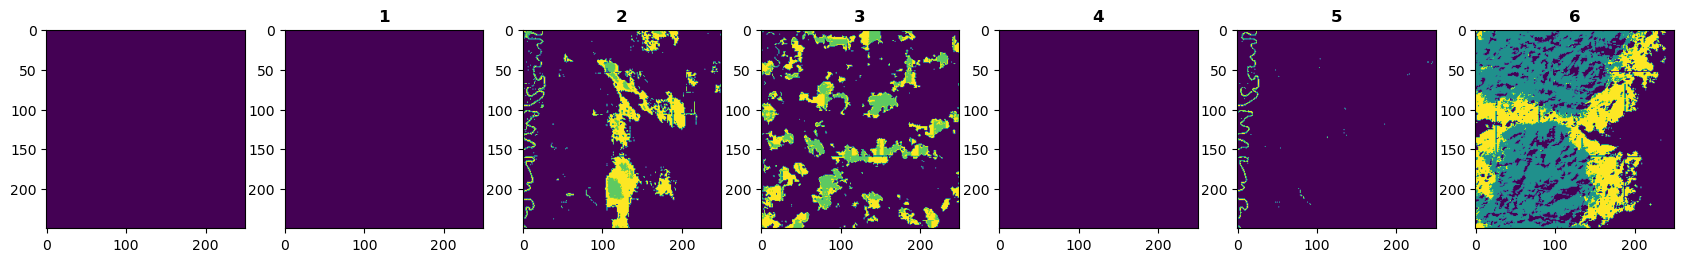

(7, 250, 250)


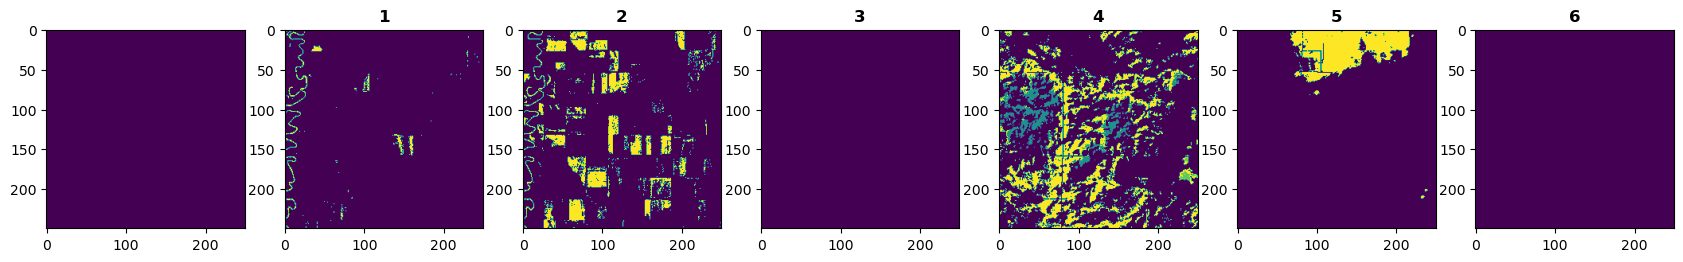

(7, 250, 250)


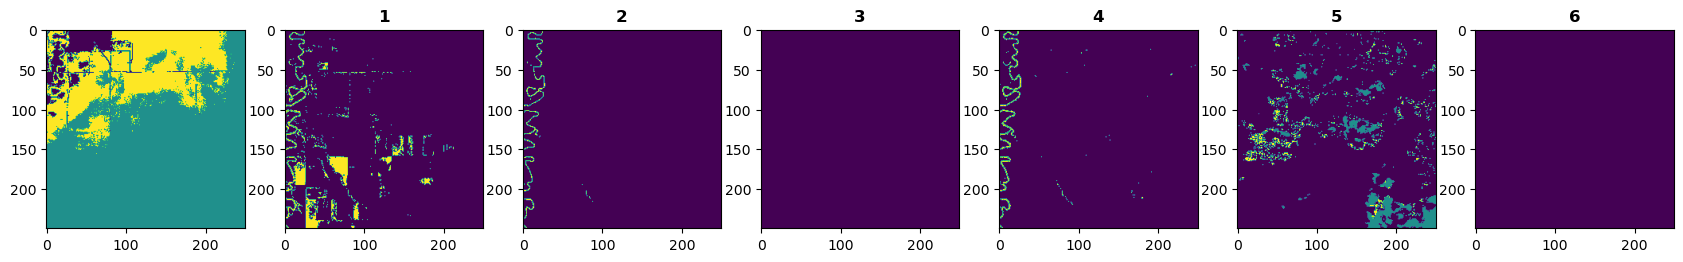

(7, 250, 250)


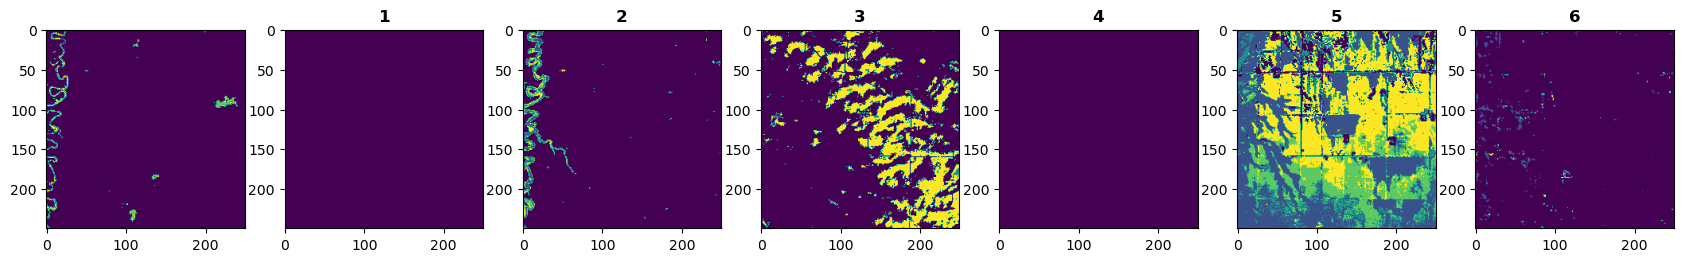

(7, 250, 250)


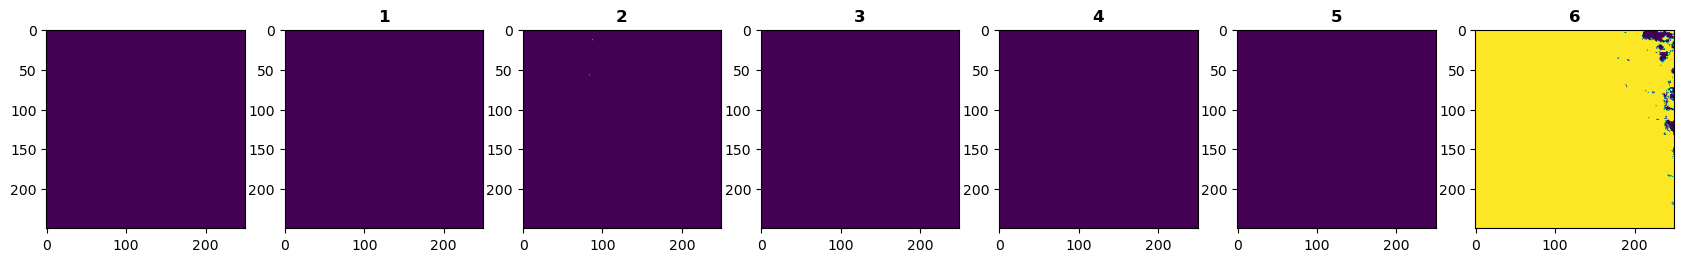

In [11]:
for row in range(0,49,7):
    # for col in range(0,9):
    t=row
    my_plot(dswe_array[t:t+7 :, :])